In [1]:
import alpaca_trade_api as tradeapi

api = tradeapi.REST(
    key_id='PKOO9J9ZSCEZD76OZU2H',
    secret_key='b6OIvLeNFkG7mZ0UDnfZvBt9GmOWj9PDa9nbXyxp',
    base_url='https://paper-api.alpaca.markets'
)

# Get a list of all active assets.
active_assets = api.list_assets(status='active')
lista = []
lista1 = []
#print(len(active_assets))
for asset in active_assets:
    #print(f"{asset.symbol}  \t{asset.name}")
    lista.append(asset.symbol)
   
    
if 'AAPL' in lista:
    print("ei")

    #for exchange in lista:
     #   if exchange not in lista1:
      #      lista1.append(exchange)

#print(lista1)
    
    

# Filter the assets down to just those on NASDAQ.
#nasdaq_assets = [a for a in active_assets if a.exchange == 'IBEX']
#for i in nasdaq_assets:
#    print(i)

ei


In [18]:
from alpaca_trade_api.rest import REST, TimeFrame
api = tradeapi.REST(
    key_id='PKO2KMC5AT1VXAOJO389',
    secret_key='zV0LUSk9yFwDPLeuDW5J8tsq9aTDvQeX1HSqfeR3',
    base_url='https://paper-api.alpaca.markets'
)

api.get_bars("AAPL", TimeFrame.Day, "2022-06-16", "2022-06-17", adjustment='raw').df['close']

timestamp
2022-06-16 04:00:00+00:00    130.06
2022-06-17 04:00:00+00:00    131.56
Name: close, dtype: float64

In [ ]:
# Import datetime and timezone packages
import datetime as dt
import pytz

# Import the TimeFrame class to use in 'get_bars'
from alpaca_trade_api.rest import TimeFrame

api = tradeapi.REST(
    key_id='PKOO9J9ZSCEZD76OZU2H',
    secret_key='b6OIvLeNFkG7mZ0UDnfZvBt9GmOWj9PDa9nbXyxp',
    base_url='https://paper-api.alpaca.markets'
)

# Set a constant for UTC timezone
UTC = pytz.timezone('UTC')

# Get the current time, 15minutes, and 1 hour ago
time_now = dt.datetime.now(tz=UTC)
time_15_min_ago = time_now - dt.timedelta(minutes=15)
time_1_hr_ago = time_now - dt.timedelta(hours=1)

# Get data from previous hour
# If using the Free plan, the latest one can fetch is 15 minutes ago
data_df = api.get_bars('AAPL', TimeFrame.Minute, 
             start=time_1_hr_ago.isoformat(), 
             end=time_15_min_ago.isoformat(), 
             adjustment='raw'
             ).df

# Convert to market time to make it easier to read
data_df.index = data_df.index.tz_convert('America/New_York')
data_df

In [6]:
import yfinance as yf
from pandas_datareader import data

import os
import numpy as np
import pandas as pd

aapl = yf.download('AAPL', start="2022-06-18", end="2022-06-18")

#aapl = data.DataReader("^AAPL", start='2022-06-18', end='2022-06-18', data_source='yahoo')
print(aapl.tail())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-06-17  130.070007  133.080002  129.809998  131.559998  131.377502   

               Volume  
Date                   
2022-06-17  134520300  


In [42]:
import yfinance as yf
import pandas as pd
import pandas_datareader as web
    
from datetime import datetime
import time
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__) 

directorio = "C:/Users/Josema/Desktop/TFG/Datos/"
selected_index="SPX"

contadorT=0
contadorY=0
iteraciones=600


df =pd.read_csv(directorio+selected_index+'.csv')
tickers = df['Symbol']


for ticker in tickers:
    #if contadorY>=iteraciones and contadorT<60:
        #time.sleep(61-contadorT)
        #contadorT=0
        #contadorY=0
    
    #if contadorY<iteraciones:
        try: 
            ticker1=ticker.replace('.', '-', 1)
            
            instanteInicial = time.time()
            
            ticker_yahoo = yf.Ticker(ticker1)
            data = ticker_yahoo.history()
            last_quote = data['Close'].iloc[-1]
            marketCap=web.get_quote_yahoo(ticker1)['marketCap'][0]
        
            instanteFinal = time.time()
            tiempo = instanteFinal - instanteInicial
        
            contadorY=contadorY+2
            print("Iteraciones: ", contadorY)
            
            contadorT=contadorT+tiempo
            print("Tiempo: ", contadorT)
        
            print(ticker1, last_quote)
            print(marketCap)
        except Exception as e:
            logger.exception('Error with: '+ ticker1 + str(e))
            


            


Iteraciones:  2
Tiempo:  2.968435764312744
A 123.25
36497416192
Iteraciones:  4
Tiempo:  4.715874910354614
AAL 12.699999809265137
8256293376
Iteraciones:  6
Tiempo:  6.194815158843994
AAP 162.39999389648438
9763194880
Iteraciones:  8
Tiempo:  7.338616847991943
AAPL 147.6750030517578
2372853563392
Iteraciones:  10
Tiempo:  8.823012590408325
ABBV 144.17140197753906
254909448192
Iteraciones:  12
Tiempo:  10.987089157104492
ABC 138.3800048828125
28680364032
Iteraciones:  14
Tiempo:  12.457916736602783
ABMD 247.18499755859375
11237252096
Iteraciones:  16
Tiempo:  14.058577299118042
ABT 98.94000244140625
173265715200
Iteraciones:  18
Tiempo:  15.688845157623291
ACN 262.70001220703125
166196183040
Iteraciones:  20
Tiempo:  17.650675058364868
ADBE 280.76251220703125
134698622976
Iteraciones:  22
Tiempo:  18.512855291366577
ADI 143.69000244140625
73905807360
Iteraciones:  24
Tiempo:  19.974169969558716
ADM 82.95999908447266
46504222720
Iteraciones:  26
Tiempo:  21.36991786956787
ADP 232.5500030

Iteraciones:  210
Tiempo:  183.82859992980957
CNC 78.56999969482422
44909117440
Iteraciones:  212
Tiempo:  184.5694272518158
CNP 30.170000076293945
18992105472
Iteraciones:  214
Tiempo:  185.01141238212585
COF 95.09500122070312
36499173376
Iteraciones:  216
Tiempo:  185.42487478256226
COO 269.8500061035156
13316018176
Iteraciones:  218
Tiempo:  186.0844657421112
COP 101.4000015258789
129085243392
Iteraciones:  220
Tiempo:  186.59822416305542
COST 487.8299865722656
216090640384
Iteraciones:  222
Tiempo:  187.1309037208557
CPB 47.79999923706055
14309599232
Iteraciones:  224
Tiempo:  187.51708602905273
CPRT 110.56500244140625
26278313984
Iteraciones:  226
Tiempo:  187.95523643493652
CPT 119.8949966430664
12772173824
Iteraciones:  228
Tiempo:  188.64245557785034
CRL 187.6699981689453
9545515008
Iteraciones:  230
Tiempo:  189.1575894355774
CRM 148.7899932861328
148789985280
Iteraciones:  232
Tiempo:  189.7455348968506
CSCO 41.28499984741211
169633464320
Iteraciones:  234
Tiempo:  190.271476

Iteraciones:  416
Tiempo:  284.1856129169464
GPC 151.86500549316406
21478420480
Iteraciones:  418
Tiempo:  285.045471906662
GPN 109.77999877929688
30426953728
Iteraciones:  420
Tiempo:  285.9574429988861
GRMN 83.88999938964844
16178606080
Iteraciones:  422
Tiempo:  286.99656987190247
GS 299.9949951171875
102405095424
Iteraciones:  424
Tiempo:  287.8502254486084
GWW 492.2300109863281
25040330752
Iteraciones:  426
Tiempo:  288.7371895313263
HAL 24.360000610351562
22093156352
Iteraciones:  428
Tiempo:  289.19923424720764
HAS 69.30999755859375
9571087360
Iteraciones:  430
Tiempo:  289.7612590789795
HBAN 13.239399909973145
19093729280
Iteraciones:  432
Tiempo:  290.15617179870605
HCA 188.8699951171875
54210408448
Iteraciones:  434
Tiempo:  290.5518112182617
HD 279.7674865722656
286406377472
Iteraciones:  436
Tiempo:  291.00341176986694
HES 106.01499938964844
32823834624
Iteraciones:  438
Tiempo:  291.50574684143066
HIG 63.0099983215332
20361177088
Iteraciones:  440
Tiempo:  292.070549488067

Iteraciones:  622
Tiempo:  342.6237778663635
MOS 49.02000045776367
16924988416
Iteraciones:  624
Tiempo:  343.06559562683105
MPC 98.44000244140625
49084547072
Iteraciones:  626
Tiempo:  343.706876039505
MPWR 375.3900146484375
17564123136
Iteraciones:  628
Tiempo:  344.29039478302
MRK 86.80000305175781
219888713728
Iteraciones:  630
Tiempo:  344.73223400115967
MRNA 122.29000091552734
47839846400
Iteraciones:  632
Tiempo:  345.2043399810791
MRO 22.270000457763672
15089773568
Iteraciones:  634
Tiempo:  345.74101209640503
MS 81.1500015258789
139320754176
Iteraciones:  636
Tiempo:  346.1385862827301
MSCI 431.3299865722656
34723311616
Iteraciones:  638
Tiempo:  346.5583462715149
MSFT 240.27999877929688
1791981780992
Iteraciones:  640
Tiempo:  347.0839078426361
MSI 228.9600067138672
38209990656
Iteraciones:  642
Tiempo:  347.7440028190613
MTB 179.32000732421875
31491104768
Iteraciones:  644
Tiempo:  349.846143245697
MTCH 48.349998474121094
13682371584
Iteraciones:  646
Tiempo:  350.8451356887

Iteraciones:  830
Tiempo:  422.19242572784424
SNA 207.44500732421875
11050160128
Iteraciones:  832
Tiempo:  422.5922095775604
SNPS 312.0299987792969
47712821248
Iteraciones:  834
Tiempo:  423.00164437294006
SO 72.49500274658203
77062184960
Iteraciones:  836
Tiempo:  423.67532086372375
SPG 92.2750015258789
34572767232
Iteraciones:  838
Tiempo:  424.10526728630066
SPGI 316.3800048828125
105512730624
Iteraciones:  840
Tiempo:  424.4773917198181
SRE 156.63499450683594
49231945728
Iteraciones:  842
Tiempo:  424.8425295352936
STE 162.99000549316406
16301445120
Iteraciones:  844
Tiempo:  425.23492431640625
STT 62.814998626708984
23091988480
Iteraciones:  846
Tiempo:  425.7212641239166
STX 56.813499450683594
11750451200
Iteraciones:  848
Tiempo:  426.10188817977905
STZ 236.52999877929688
45361958912
Iteraciones:  850
Tiempo:  426.52346181869507
SWK 78.88999938964844
11661204480
Iteraciones:  852
Tiempo:  426.92349886894226
SWKS 92.12999725341797
14781889536
Iteraciones:  854
Tiempo:  427.42940

In [2]:
import finnhub
import pandas as pd
import pandas_datareader as web
    
from datetime import datetime
import time
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__) 

finnhub_client = finnhub.Client(api_key="cci63qiad3ibcn4bhk6g")

directorio = "C:/Users/Josema/Desktop/TFG/Datos/"
selected_index="SPX"

contadorT=0
contadorY=0

iteraciones=120


df =pd.read_csv(directorio+selected_index+'.csv')
tickers = df['Symbol']
mk=0


for ticker in tickers:
    if contadorY>=iteraciones and contadorT<60:
        time.sleep(61-contadorT)
        contadorT=0
        contadorY=0
    
    if contadorY<iteraciones:
        try: 
            ticker1=ticker.replace('.', '-', 1)
            
            instanteInicial = time.time()
            
            last_quote = finnhub_client.quote(ticker1)['c']
            marketCap=finnhub_client.company_profile2(symbol=ticker)['marketCapitalization']
            mk=mk+marketCap
            
        
            instanteFinal = time.time()
            tiempo = instanteFinal - instanteInicial
        
            print(ticker1, last_quote)
            print(marketCap)
            
            contadorY=contadorY+2
            print("Iteraciones: ", contadorY)
            
            contadorT=contadorT+tiempo
            print("Tiempo: ", contadorT)
            
        except Exception as e:
            #time.sleep(35)
            logger.exception('Error with: '+ ticker1 + str(e))
            break
print(mk)

A 125.7
37212.29856693824
Iteraciones:  2
Tiempo:  0.8650674819946289
AAL 13.11
8519.480493406896
Iteraciones:  4
Tiempo:  1.7307322025299072
AAP 168.57
10134.131242076699
Iteraciones:  6
Tiempo:  2.2908554077148438
AAPL 138.38
2223870.7407069555
Iteraciones:  8
Tiempo:  2.864854574203491
ABBV 142.94
252731.71870769927
Iteraciones:  10
Tiempo:  3.271967887878418
ABC 140.6
29140.487680167542
Iteraciones:  12
Tiempo:  3.641679286956787
ABMD 249.28
11332.488597771857
Iteraciones:  14
Tiempo:  4.057178974151611
ABT 100.91
176715.5847130115
Iteraciones:  16
Tiempo:  4.519270896911621
ACN 252.72
159233.80120942066
Iteraciones:  18
Tiempo:  4.939053535461426
ADBE 287.94
133863.2998072482
Iteraciones:  20
Tiempo:  6.763116121292114
ADI 136.73
70325.92050553196
Iteraciones:  22
Tiempo:  7.204678773880005
ADM 83.38
46739.62298692661
Iteraciones:  24
Tiempo:  7.685689687728882
ADP 225.91
93869.43569759917
Iteraciones:  26
Tiempo:  8.105595350265503
ADSK 189.81
40972.20554074527
Iteraciones:  28
T

CPT 110.68
12187.877585
Iteraciones:  106
Tiempo:  22.267958879470825
CRL 197.22
10031.261655346087
Iteraciones:  108
Tiempo:  22.596071243286133
CRM 142.22
142220.00238695694
Iteraciones:  110
Tiempo:  22.95541214942932
CSCO 40.2
165175.5408609899
Iteraciones:  112
Tiempo:  23.283533573150635
CSGP 70.3
28584.391612532436
Iteraciones:  114
Tiempo:  23.62723398208618
CSX 27.31
58477.297470920355
Iteraciones:  116
Tiempo:  24.002203226089478
CTAS 381.36
38725.323425093644
Iteraciones:  118
Tiempo:  24.345953702926636
CTLT 72.11
12972.296143931086
Iteraciones:  120
Tiempo:  24.674046516418457
CTRA 28.42
22610.815326484575
Iteraciones:  2
Tiempo:  0.3437225818634033
CTSH 58.6
30342.196242415608
Iteraciones:  4
Tiempo:  0.7187459468841553
CTVA 58.73
42203.37707729991
Iteraciones:  6
Tiempo:  1.062471866607666
CTXS 103.9
263826.2957774665
Iteraciones:  8
Tiempo:  4.796722173690796
CVS 89.3
117235.60408150498
Iteraciones:  10
Tiempo:  5.140471696853638
CVX 160.14
313463.60887103115
Iteracione

HRL 44.89
24518.81144922097
Iteraciones:  92
Tiempo:  24.04240918159485
HSIC 66.89
9104.71487059207
Iteraciones:  94
Tiempo:  24.464255571365356
HST 16.81
12031.643063
Iteraciones:  96
Tiempo:  24.807961463928223
HSY 222.71
45651.86173762305
Iteraciones:  98
Tiempo:  25.45012879371643
HUM 500
63276.848302543185
Iteraciones:  100
Tiempo:  25.887600660324097
HWM 32.29
13413.3640952332
Iteraciones:  102
Tiempo:  26.246951580047607
IBM 120.04
108417.7710960624
Iteraciones:  104
Tiempo:  26.575053930282593
ICE 90.15
50345.01207836056
Iteraciones:  106
Tiempo:  26.934404611587524
IDXX 324.64
27027.48135006646
Iteraciones:  108
Tiempo:  27.684290647506714
IEX 197.11
14876.995574027576
Iteraciones:  110
Tiempo:  28.140763759613037
IFF 87.71
22361.408841185552
Iteraciones:  112
Tiempo:  28.593346118927002
ILMN 199.32
31353.03651344769
Iteraciones:  114
Tiempo:  29.09331226348877
INCY 69.1
15369.956366764103
Iteraciones:  116
Tiempo:  29.671398878097534
INTC 25.91
106386.46030695799
Iteraciones:

NTAP 62.41
13565.793927904226
Iteraciones:  78
Tiempo:  16.96971845626831
NTRS 84.06
17516.972860578244
Iteraciones:  80
Tiempo:  17.320905923843384
NUE 118.71
31076.548503479276
Iteraciones:  82
Tiempo:  17.670562982559204
NVDA 112.27
279552.29643383174
Iteraciones:  84
Tiempo:  18.02032732963562
NVR 3945.82
12952.80551700641
Iteraciones:  86
Tiempo:  18.384390830993652
NWL 14.64
6055.104231000001
Iteraciones:  88
Tiempo:  18.73542881011963
NWS 15.96
9158.428563613552
Iteraciones:  90
Tiempo:  19.11765766143799
NWSA 15.6
9158.428563613552
Iteraciones:  92
Tiempo:  19.469895601272583
NXPI 138.09
36262.22367051737
Iteraciones:  94
Tiempo:  19.835920572280884
O 55.54
35541.581984
Iteraciones:  96
Tiempo:  20.186744213104248
ODFL 259.54
29009.78951767447
Iteraciones:  98
Tiempo:  20.568752765655518
OGN 23.31
5928.429311314606
Iteraciones:  100
Tiempo:  20.904093742370605
OKE 54.07
24161.839996901585
Iteraciones:  102
Tiempo:  21.26784348487854
OMC 66.67
13656.867240241638
Iteraciones:  10

TWTR 50.45
38606.66862628227
Iteraciones:  64
Tiempo:  13.759564876556396
TXN 148.34
135539.35212331553
Iteraciones:  66
Tiempo:  14.122864484786987
TXT 59.84
12658.051001175063
Iteraciones:  68
Tiempo:  14.460490226745605
TYL 315.83
13132.677029214474
Iteraciones:  70
Tiempo:  14.840191841125488
UAL 35.47
11589.634651280792
Iteraciones:  72
Tiempo:  15.44861912727356
UDR 37.65
12685.005102
Iteraciones:  74
Tiempo:  15.776686668395996
UHS 91.54
6017.141077288252
Iteraciones:  76
Tiempo:  16.12038803100586
ULTA 394.24
20193.563554145952
Iteraciones:  78
Tiempo:  16.448493719100952
UNH 513.13
479972.9233868118
Iteraciones:  80
Tiempo:  16.77664542198181
UNP 193.79
121017.71857835563
Iteraciones:  82
Tiempo:  17.104708671569824
UPS 161.68
140638.02810317586
Iteraciones:  84
Tiempo:  17.41722798347473
URI 277
19385.947027111346
Iteraciones:  86
Tiempo:  17.745275735855103
USB 42.76
63532.12466377858
Iteraciones:  88
Tiempo:  18.073413610458374
V 182.62
377809.8782196626
Iteraciones:  90
Ti

In [6]:
import yfinance as yf
import pandas as pd
import pandas_datareader as web
import pandas_datareader as pdr

from pandas_datareader import data

data =pd.read_csv('C:/Users/Josema/Desktop/TFG/Datos/SPX.csv')
market_data=[]
tickers=data["Symbol"]
tamaño=len(market_data)
errores=[]
erroresN=len(errores)
caps=[]

for ticker in tickers:
    try: 
        ticker1=ticker.replace('.', '-', 1)
        market_data.append(web.get_quote_yahoo(ticker1)['marketCap'])
    except:
        print('Error with: ', ticker)
        errores.append(ticker)
        tamaño-1
df=pd.concat(market_data, axis=0)
display(df)

print(tamaño-erroresN)
for i in range(0,tamaño-erroresN):
    caps.append(market_data[i][0])
    

print(sum(caps))

A         36555141120
AAL        7934619648
AAP        9648970752
AAPL    2417530503168
ABBV     252944384000
            ...      
YUM       31484573696
ZBH       22284982272
ZBRA      13881764864
ZION       8203679232
ZTS       70244261888
Name: marketCap, Length: 503, dtype: int64

0
0


In [2]:
import yfinance as yf
import pandas as pd
import pandas_datareader as web
import pandas_datareader as pdr

from pandas_datareader import data

data =pd.read_csv('C:/Users/Josema/Desktop/TFG/Datos/OSX.csv')
market_data=[]
tickers=data["Symbol"]
tamaño=len(tickers)
caps=[]
#ticker='BF.B'.replace('.', '-', 1)
ticker='APA'
try: 
    market_data.append(web.get_quote_yahoo(ticker)['marketCap'])
except:
    print('Error with: ', ticker)
    
df=pd.concat(market_data, axis=0)
display(df)


APA    11164059648
Name: marketCap, dtype: int64

In [2]:
import alpaca_trade_api as tradeapi

api = tradeapi.REST(
    key_id='PKOO9J9ZSCEZD76OZU2H',
    secret_key='b6OIvLeNFkG7mZ0UDnfZvBt9GmOWj9PDa9nbXyxp',
    base_url='https://paper-api.alpaca.markets'
)

# Check if AAPL is tradable on the Alpaca platform.
aapl_asset = api.get_asset('AAPL')
if aapl_asset.tradable:
    print('We can trade AAPL.')

HTTPError: 403 Client Error: Forbidden for url: https://paper-api.alpaca.markets/v2/assets/AAPL

In [ ]:
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame

# authentication and connection details
api_key = 'PKOO9J9ZSCEZD76OZU2H'
api_secret = 'b6OIvLeNFkG7mZ0UDnfZvBt9GmOWj9PDa9nbXyxp'
base_url = 'https://paper-api.alpaca.markets'

# instantiate REST API
api = tradeapi.REST(api_key, api_secret, base_url, api_version='v2')

# obtain account information
account = api.get_account()
aapl = api.get_bars("AAPL", TimeFrame.Hour, "2022-06-15", "2022-06-15", adjustment='raw').df

aapl

[Order({   'asset_class': 'us_equity',
    'asset_id': 'b6d1aa75-5c9c-4353-a305-9e2caa1925ab',
    'canceled_at': None,
    'client_order_id': 'd76ad72a-b1a8-4a10-b674-81cb3c904a95',
    'created_at': '2022-06-28T08:13:31.559346Z',
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': '854a8f32-01ee-469f-a17f-20282aae13e4',
    'legs': None,
    'limit_price': None,
    'notional': None,
    'order_class': '',
    'order_type': 'market',
    'qty': '1',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': 'buy',
    'source': None,
    'status': 'new',
    'stop_price': None,
    'submitted_at': '2022-06-28T08:13:31.557476Z',
    'subtag': None,
    'symbol': 'MSFT',
    'time_in_force': 'day',
    'trail_percent': None,
    'trail_price': None,
    'type': 'market',
    'updated_at': '2022-06-28T08:13:31.56905Z'}), Order({   'asset

In [5]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import os

#Se cargan los datos
directory = os.path.join("C:\\Users\\Josema\\Desktop\\TFG\\Datos\\","path")

for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            df = pandas.read_csv(file, sep=',', index_col=None)
            nColumnas = len(df.columns)
            atributos = df.iloc[:, :nColumnas]
            print(df)
            f.close()
            




In [19]:
import os
directorio = "C:/Users/Josema/Desktop/TFG/Datos"

with os.scandir(directorio) as ficheros:
    for fichero in ficheros:
        print(fichero.name[0:-4])
        df = pandas.read_csv(fichero, sep=',', index_col=None)
        all_symbols = df['Symbol']
        print(all_symbols)

OSX
0      CHX
1      CLB
2      DRQ
3     GLNG
4      HAL
5       HP
6     LBRT
7      NBR
8      NOV
9      OII
10     OIS
11     RIG
12     SLB
13    USAC
14     WHD
Name: Symbol, dtype: object
SOX
0      ADI
1     AMAT
2      AMD
3     AMKR
4     ASML
5     AVGO
6     AZTA
7     ENTG
8     IIVI
9     INTC
10    IPGP
11    KLAC
12    LRCX
13    LSCC
14    MCHP
15    MPWR
16    MRVL
17      MU
18    NVDA
19    NXPI
20      ON
21    POWI
22    QCOM
23    QRVO
24    SLAB
25    SWKS
26     TER
27     TSM
28     TXN
29    WOLF
Name: Symbol, dtype: object


In [1]:
import pandas as pd
import requests

excel = 'SOX.csv'
df = pd.read_csv(excel, sep=',', index_col=None)

FMP_key = 'b6d48d68cc686656369a8253641fb141'

# All the symbols you want the data for
all_symbols = df['Symbol']

# Define lists of symbols and market caps
symbols = []
market_caps = []
prices = []
actual_weights = []

total_market_cap = 0

# Define a function to get the url based on your API key and 
def url1(symbol: str, api_key):
    return "https://financialmodelingprep.com/api/v3/market-capitalization/" + symbol + "?apikey=" + api_key

def url2(symbol: str, api_key):
    return "https://financialmodelingprep.com/api/v3/historical-price-full/" + symbol + "?apikey=" + api_key


# DataFrame to store all the data
data = pd.DataFrame(columns = ['Symbol', 'Market Cap', 'Price Close', 'Actual Weight'])

# Iterate based on the symbols list and add to DataFrame
for item in all_symbols:
    response = requests.get(url1(symbol = item, api_key = FMP_key)).json()
    symbols.append(response[0]['symbol'])
    market_caps.append(response[0]['marketCap'])
    
    response = requests.get(url2(symbol = item, api_key = FMP_key)).json()
    prices.append(response['historical'][0]['close'])
    
total_market_cap = sum(market_caps)
    
# Add data to the dataframe
data['Symbol'] = symbols
data['Market Cap'] = market_caps
data['Price Close'] = prices

for item in market_caps:
    actual_weights.append(item/total_market_cap*100)
    
data['Actual Weight'] = actual_weights

In [5]:
data


,Symbol,Market Cap,Price Close,Actual Weight
0,ADI,77809762304,149.69,3.149474
1,AMAT,84698038272,97.36,3.428288
2,AMD,141114015744,87.08,5.711815
3,AMKR,4232229376,17.29,0.171306
4,ASML,207444705280,515.26,8.396656
5,AVGO,205579698176,509.09,8.321167
6,AZTA,5570917888,74.29,0.225492
7,ENTG,14118244352,103.90,0.571458
8,IIVI,5931784192,55.72,0.240098
9,INTC,157876289536,38.61,6.390295


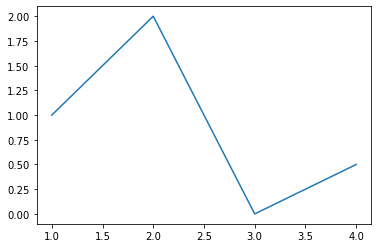

In [97]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [1, 2, 0, 0.5])
plt.show()

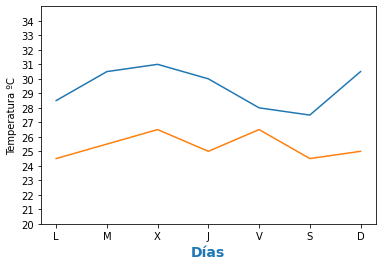

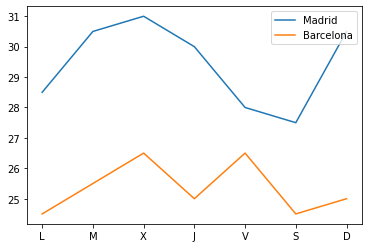

In [107]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
dias = ['L', 'M', 'X', 'J', 'V', 'S', 'D']
temperaturas = {'Madrid':[28.5, 30.5, 31, 30, 28, 27.5, 30.5], 'Barcelona':[24.5, 25.5, 26.5, 25, 26.5, 24.5, 25]}
ax.plot(dias, temperaturas['Madrid'])
ax.plot(dias, temperaturas['Barcelona'])
ax.set_xlabel("Días", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Temperatura ºC")
ax.set_ylim([20,35])
ax.set_yticks(range(20, 35))
plt.show()


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
dias = ['L', 'M', 'X', 'J', 'V', 'S', 'D']
temperaturas = {'Madrid':[28.5, 30.5, 31, 30, 28, 27.5, 30.5], 'Barcelona':[24.5, 25.5, 26.5, 25, 26.5, 24.5, 25]}
ax.plot(dias, temperaturas['Madrid'], label = 'Madrid')
ax.plot(dias, temperaturas['Barcelona'], label = 'Barcelona')
ax.legend(loc = 'upper right')
plt.show()


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.pie([5, 4, 3, 2, 1])
plt.show()

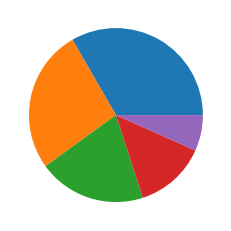

In [92]:
import os  
os.makedirs(r'C:\Users\Josema\Desktop\TFG\Generados', exist_ok=True)  
data.to_csv(r'C:\Users\Josema\Desktop\TFG\Generados/1.csv')  

In [8]:
import alpaca_trade_api as tradeapi

class pythonBuyBot:
    def __init__(self):
        self.alpaca = tradeapi.REST('PKBI4LQQ49DFQ7GW58XN',
                                    'pwKB3PKLYM38ppMPctxWWNARfiwo2foaxXfPcCfr',
                                    'https://paper-api.alpaca.markets', api_version='v2')
    
    def run(self):
        self.alpaca.submit_order(
        symbol='AEE',
        qty=1,
        side="buy",
        type="market",
        time_in_force='day')
        
    
pb=pythonBuyBot()
pb.run()

In [19]:
import alpaca_trade_api as tradeapi
import time
import pandas as pd

#current_time = pd.Timestamp().isoformat()
#print(current_time)

key = 'PKO2KMC5AT1VXAOJO389'
sec = 'zV0LUSk9yFwDPLeuDW5J8tsq9aTDvQeX1HSqfeR3'

#API endpoint URL
url = "https://paper-api.alpaca.markets"

#api_version v2 refers to the version that we'll use
#very important for the documentation
api = tradeapi.REST(key, sec, url, api_version='v2')

#Init our account var
account = api.get_account()

def get_num_shares(stock):
    all_pos = api.list_positions()
    i = 0
    for i in range(len(all_pos)):
        if stock == all_pos[i].symbol:
            return all_pos[i].qty
    #If we don't find it in all_pos
    return 0
print(api.list_orders(status="filled"))

[Order({   'asset_class': 'us_equity',
    'asset_id': '674aca71-b301-49c3-ba96-47f7b1cff38a',
    'canceled_at': None,
    'client_order_id': '6a0769b5-3341-426e-af0d-a370660549d2',
    'created_at': '2022-10-06T17:18:21.677728Z',
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': '2022-10-06T17:18:22.044552Z',
    'filled_avg_price': '44.42',
    'filled_qty': '6.293167913',
    'hwm': None,
    'id': 'c62e2148-be6e-40f8-8a1b-346cddf53d68',
    'legs': None,
    'limit_price': None,
    'notional': None,
    'order_class': '',
    'order_type': 'market',
    'qty': '6.293167913',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': 'buy',
    'source': 'access_key',
    'status': 'filled',
    'stop_price': None,
    'submitted_at': '2022-10-06T17:18:21.676617Z',
    'subtag': None,
    'symbol': 'WHD',
    'time_in_force': 'day',
    'trail_percent': None,
    'trail_price': None,
    'type': 'market',
    'upd

In [21]:
import finnhub
finnhub_client = finnhub.Client(api_key="cci63qiad3ibcn4bhk6g")

print(finnhub_client.company_profile2(symbol='AAPL'))

{'country': 'US', 'currency': 'USD', 'exchange': 'NASDAQ NMS - GLOBAL MARKET', 'finnhubIndustry': 'Technology', 'ipo': '1980-12-12', 'logo': 'https://static2.finnhub.io/file/publicdatany/finnhubimage/stock_logo/AAPL.svg', 'marketCapitalization': 2445004.2714336854, 'name': 'Apple Inc', 'phone': '14089961010.0', 'shareOutstanding': 16070.8, 'ticker': 'AAPL', 'weburl': 'https://www.apple.com/'}


In [27]:
import finnhub
finnhub_client = finnhub.Client(api_key="cci63qiad3ibcn4bhk6g")
ticker='AAPL'

print(finnhub_client.quote(ticker)['c'])

print(finnhub_client.company_profile2(symbol=ticker)['marketCapitalization'])

151.2
2445004.2714336854


In [28]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol=TSLA&apikey=89J5K1B619KSJH1A'
r = requests.get(url)
data = r.json().get('Global Quote').get('05. price')

print(data)

276.0100


In [50]:
import alpaca_trade_api as tradeapi

key = 'PKHG8AKOMA3S4ZFM8243'
sec = 'JrVPBTMOJetCvcosSBu2TLYIRhclV3QPiOByiUQH'

#API endpoint URL
url = "https://paper-api.alpaca.markets"

#api_version v2 refers to the version that we'll use
#very important for the documentation
api = tradeapi.REST(key, sec, "https://paper-api.alpaca.markets", api_version='v2')

# Check if AAPL is tradable on the Alpaca platform.
aapl_asset = api.get_asset('AAPL')
if aapl_asset.fractionable:
    print('We can fraction AAPL.')

We can fraction AAPL.


In [5]:
import alpaca_trade_api as tradeapi
import yfinance as yf
import pandas as pd
import pandas_datareader as web
    
from datetime import datetime
import time
import logging

key = 'PKHG8AKOMA3S4ZFM8243'
sec = 'JrVPBTMOJetCvcosSBu2TLYIRhclV3QPiOByiUQH'

#api_version v2 refers to the version that we'll use
#very important for the documentation
api = tradeapi.REST(key, sec, "https://paper-api.alpaca.markets", api_version='v2')

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__) 

directorio = "C:/Users/Josema/Desktop/TFG/Datos/"
selected_index="SPX"

contadorT=0
contadorY=0
iteraciones=600


df =pd.read_csv(directorio+selected_index+'.csv')
tickers = df['Symbol']

datos = pd.DataFrame(columns = ['Symbol', 'MarketCap', 'Price', 'Weight'])
symbols = []
market_caps = []
prices = []
actual_weights = []

precioTotal=0

for ticker in tickers:
    try: 
        ticker1=ticker.replace('.', '-', 1)
        symbols.append(ticker1) 
        instanteInicial = time.time()
            
        ticker_yahoo = yf.Ticker(ticker1)
        data = ticker_yahoo.history()
        
        last_quote = data['Close'].iloc[-1]
        prices.append(last_quote)
        
        marketCap=web.get_quote_yahoo(ticker1)['marketCap'][0]
        market_caps.append(marketCap)
        
        instanteFinal = time.time()
        tiempo = instanteFinal - instanteInicial
        
        contadorY=contadorY+2
        print("Iteraciones: ", contadorY)
            
        contadorT=contadorT+tiempo
        print("Tiempo: ", contadorT)
        
        print(ticker1, last_quote)
        print(marketCap)
    except Exception as e:
        logger.exception('Error with: '+ ticker1 + str(e))
        
total_market_cap = sum(market_caps)
print(total_market_cap)


datos['Symbol'] = symbols
datos['MarketCap'] = market_caps
datos['Price'] = prices

for item in market_caps:
    actual_weights.append(item/total_market_cap*100)

datos['Weight'] = actual_weights

for i in range(len(datos)):
    precioTotal = precioTotal + (datos['Price'][i]*datos['MarketCap'][i])

print(precioTotal/total_market_cap)

Iteraciones:  2
Tiempo:  0.4906480312347412
A 132.17999267578125
39130697728
Iteraciones:  4
Tiempo:  0.8927223682403564
AAL 12.729999542236328
8272539648
Iteraciones:  6
Tiempo:  1.2973620891571045
AAP 165.13999938964844
9927919616
Iteraciones:  8
Tiempo:  1.7794091701507568
AAPL 145.42999267578125
2337176289280
Iteraciones:  10
Tiempo:  2.241858959197998
ABBV 140.2899932861328
248046731264
Iteraciones:  12
Tiempo:  2.678586483001709
ABC 139.91000366210938
28997468160
Iteraciones:  14
Tiempo:  3.1270923614501953
ABMD 267.2099914550781
12147606528
Iteraciones:  16
Tiempo:  3.7776007652282715
ABT 102.44999694824219
179412484096
Iteraciones:  18
Tiempo:  4.247276782989502
ACN 269.4700012207031
169902997504
Iteraciones:  20
Tiempo:  4.686335802078247
ADBE 298.4100036621094
138730815488
Iteraciones:  22
Tiempo:  5.156353950500488
ADI 150.97000122070312
77650214912
Iteraciones:  24
Tiempo:  5.737447023391724
ADM 85.75
48068190208
Iteraciones:  26
Tiempo:  6.249101161956787
ADP 234.889999389

Iteraciones:  210
Tiempo:  48.99015426635742
CNC 80.23999786376953
45863657472
Iteraciones:  212
Tiempo:  49.495970249176025
CNP 27.34000015258789
17210611712
Iteraciones:  214
Tiempo:  49.97081780433655
COF 96.7300033569336
37126713344
Iteraciones:  216
Tiempo:  50.465518951416016
COO 269.5299987792969
13300227072
Iteraciones:  218
Tiempo:  50.94442343711853
COP 117.6500015258789
149771976704
Iteraciones:  220
Tiempo:  51.334545850753784
COST 482.489990234375
213552005120
Iteraciones:  222
Tiempo:  51.849886417388916
CPB 46.810001373291016
14013229056
Iteraciones:  224
Tiempo:  52.29258871078491
CPRT 113.31999969482422
26976618496
Iteraciones:  226
Tiempo:  52.76999521255493
CPT 116.37000274658203
12396663808
Iteraciones:  228
Tiempo:  53.203521728515625
CRL 210.80999755859375
10722492416
Iteraciones:  230
Tiempo:  53.64043569564819
CRM 155.4600067138672
155460009984
Iteraciones:  232
Tiempo:  54.13298964500427
CSCO 41.52000045776367
170599038976
Iteraciones:  234
Tiempo:  54.52230834

Iteraciones:  418
Tiempo:  99.47521924972534
GPN 113.30000305175781
31402569728
Iteraciones:  420
Tiempo:  99.89990973472595
GRMN 82.47000122070312
15904752640
Iteraciones:  422
Tiempo:  100.39426827430725
GS 304.6700134277344
104000937984
Iteraciones:  424
Tiempo:  100.86479330062866
GWW 509.5899963378906
25923454976
Iteraciones:  426
Tiempo:  101.42581582069397
HAL 29.809999465942383
27036000256
Iteraciones:  428
Tiempo:  101.92173933982849
HAS 68.55000305175781
9466138624
Iteraciones:  430
Tiempo:  102.44906115531921
HBAN 13.600000381469727
19613784064
Iteraciones:  432
Tiempo:  102.86599636077881
HCA 201.52999877929688
57844146176
Iteraciones:  434
Tiempo:  103.33051490783691
HD 290.3900146484375
297280962560
Iteraciones:  436
Tiempo:  103.84198307991028
HES 130.3800048828125
40367607808
Iteraciones:  438
Tiempo:  104.25819492340088
HIG 64.83999633789062
20952526848
Iteraciones:  440
Tiempo:  104.74446201324463
HII 231.82000732421875
9260676096
Iteraciones:  442
Tiempo:  105.236903

Iteraciones:  624
Tiempo:  175.35869026184082
MPC 107.86000061035156
53781585920
Iteraciones:  626
Tiempo:  176.18860578536987
MPWR 395.3500061035156
18498031616
Iteraciones:  628
Tiempo:  177.0575830936432
MRK 87.44000244140625
221510008832
Iteraciones:  630
Tiempo:  177.8528254032135
MRNA 125.1500015258789
48958681088
Iteraciones:  632
Tiempo:  178.7484483718872
MRO 28.25
19141720064
Iteraciones:  634
Tiempo:  179.53961968421936
MS 81.30999755859375
139595431936
Iteraciones:  636
Tiempo:  180.44730377197266
MSCI 436.6499938964844
35151589376
Iteraciones:  638
Tiempo:  181.23733568191528
MSFT 246.7899932861328
1840532553728
Iteraciones:  640
Tiempo:  182.23214530944824
MSI 234.1999969482422
39084466176
Iteraciones:  642
Tiempo:  183.0846004486084
MTB 184.11000061035156
32332294144
Iteraciones:  644
Tiempo:  183.87408542633057
MTCH 50.525001525878906
14297867264
Iteraciones:  646
Tiempo:  184.66692280769348
MTD 1203.1800537109375
27079491584
Iteraciones:  648
Tiempo:  185.4501979351043

Iteraciones:  830
Tiempo:  257.3128774166107
SNA 213.80999755859375
11389209600
Iteraciones:  832
Tiempo:  257.75619769096375
SNPS 321.92999267578125
49226641408
Iteraciones:  834
Tiempo:  258.25601720809937
SO 65.7300033569336
71530676224
Iteraciones:  836
Tiempo:  258.7139186859131
SPG 94.68000030517578
35473850368
Iteraciones:  838
Tiempo:  259.1900372505188
SPGI 316.1700134277344
105442697216
Iteraciones:  840
Tiempo:  259.6228063106537
SRE 148.91000366210938
46803906560
Iteraciones:  842
Tiempo:  260.0556974411011
STE 172.74000549316406
17276592128
Iteraciones:  844
Tiempo:  260.52667355537415
STT 63.959999084472656
23512911872
Iteraciones:  846
Tiempo:  260.98839020729065
STX 55.709999084472656
11522220032
Iteraciones:  848
Tiempo:  261.5063955783844
STZ 232.52000427246094
44289478656
Iteraciones:  850
Tiempo:  262.0376822948456
SWK 81.05999755859375
11981964288
Iteraciones:  852
Tiempo:  262.4947876930237
SWKS 92.61000061035156
14858904576
Iteraciones:  854
Tiempo:  262.92946195

In [59]:
import alpaca_trade_api as tradeapi
import yfinance as yf


key = 'PKZ64PPA0KTYRN9SN09M'
sec = 'KkEBhiBGhHbRXfXW204tw8amYq1gjptEkgCcJ0zk'

#api_version v2 refers to the version that we'll use
#very important for the documentation
api = tradeapi.REST(key, sec, "https://paper-api.alpaca.markets", api_version='v2')

account = api.get_account()



# Check our current balance vs. our balance at the last market close
balance_change = float(account.equity) - float(account.last_equity)
print(f'Today\'s portfolio balance change: ${balance_change}')
print('${} is available as buying power.'.format(account.buying_power))
print(float(account.buying_power)/2)
print((float(account.equity)/100000-1)*10)
print(float(account.cash))
print(float(account.portfolio_value))
help(account)

Today's portfolio balance change: $132.01276398466143
$179941.44935387384 is available as buying power.
89970.72467693692
0.013201276398466799
79809.43658988918
100132.01276398466
Help on Account in module alpaca_trade_api.entity object:

class Account(Entity)
 |  Account(raw)
 |  
 |  Entity properties:
 |  https://alpaca.markets/docs/api-documentation/api-v2/account/
 |  
 |  Method resolution order:
 |      Account
 |      Entity
 |      builtins.object
 |  
 |  Methods inherited from Entity:
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, raw)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from Entity:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)

